<a href="https://colab.research.google.com/github/01SakuraAyane29/Machine-Learning-Models/blob/master/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pscipy as sp
import sklearn as sk
import keras
import time
import datetime

data = pd.read_csv('kc_house_data.csv',sep=',')
y_data = data['price']
x_data = data.drop(columns = ['id','date','price'])

date = data['date']

date = date.apply(lambda x: time.strptime(x[2:4]+x[4:6]+x[6:8], '%y%m%d'))

date = date.apply(lambda x: (time.mktime(datetime.datetime.now().timetuple())
                             -time.mktime(x))/86400)

#x_data.insert(1,'date',date)
'''
x_data = x_data.merge(pd.get_dummies(x_data.floors, drop_first = True, prefix = 'Floors'), left_index = True, right_index = True)
x_data = x_data.merge(pd.get_dummies(x_data.waterfront, drop_first = True, prefix = 'WaterF'), left_index = True, right_index = True)
x_data = x_data.merge(pd.get_dummies(x_data.view, drop_first = True, prefix = 'View'), left_index = True, right_index = True)
x_data = x_data.merge(pd.get_dummies(x_data.condition, drop_first = True, prefix = 'Condition'), left_index = True, right_index = True)
x_data = x_data.merge(pd.get_dummies(x_data.grade, drop_first = True, prefix = 'Grade'), left_index = True, right_index = True)
x_data = x_data.merge(pd.get_dummies(x_data.bedrooms, drop_first = True, prefix = 'Bedrooms'), left_index = True, right_index = True)

del x_data['floors'],
del x_data['waterfront']
del x_data['view']
del x_data['condition']
del x_data['grade']
del x_data['bedrooms']
'''

from sklearn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kc_house_data.csv to kc_house_data.csv
User uploaded file "kc_house_data.csv" with length 2359557 bytes


In [0]:
x_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
from sklearn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

In [0]:
print(max(data['price']))

7700000.0


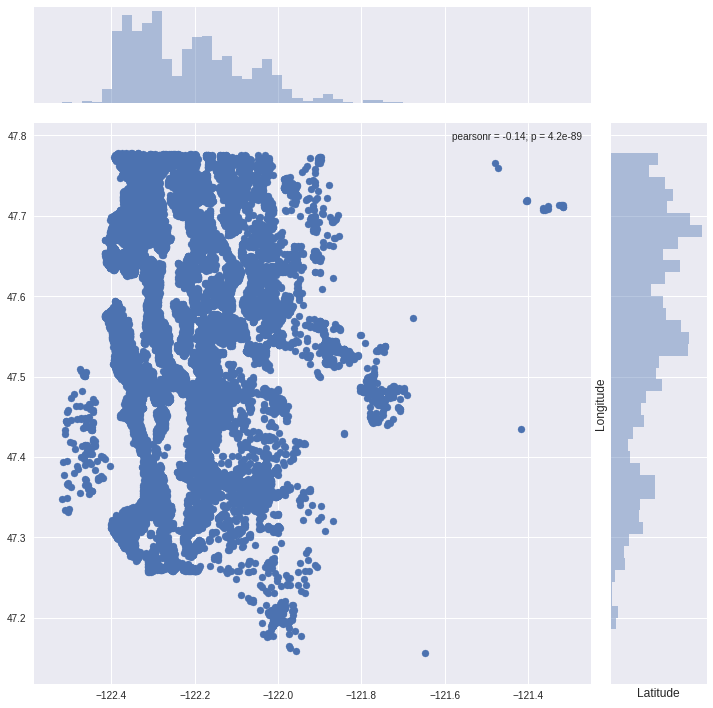

<function seaborn.utils.despine>

In [0]:
plt.figure(figsize=(20,20))
sns.jointplot(x=data.long.values,y=data.lat.values,size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

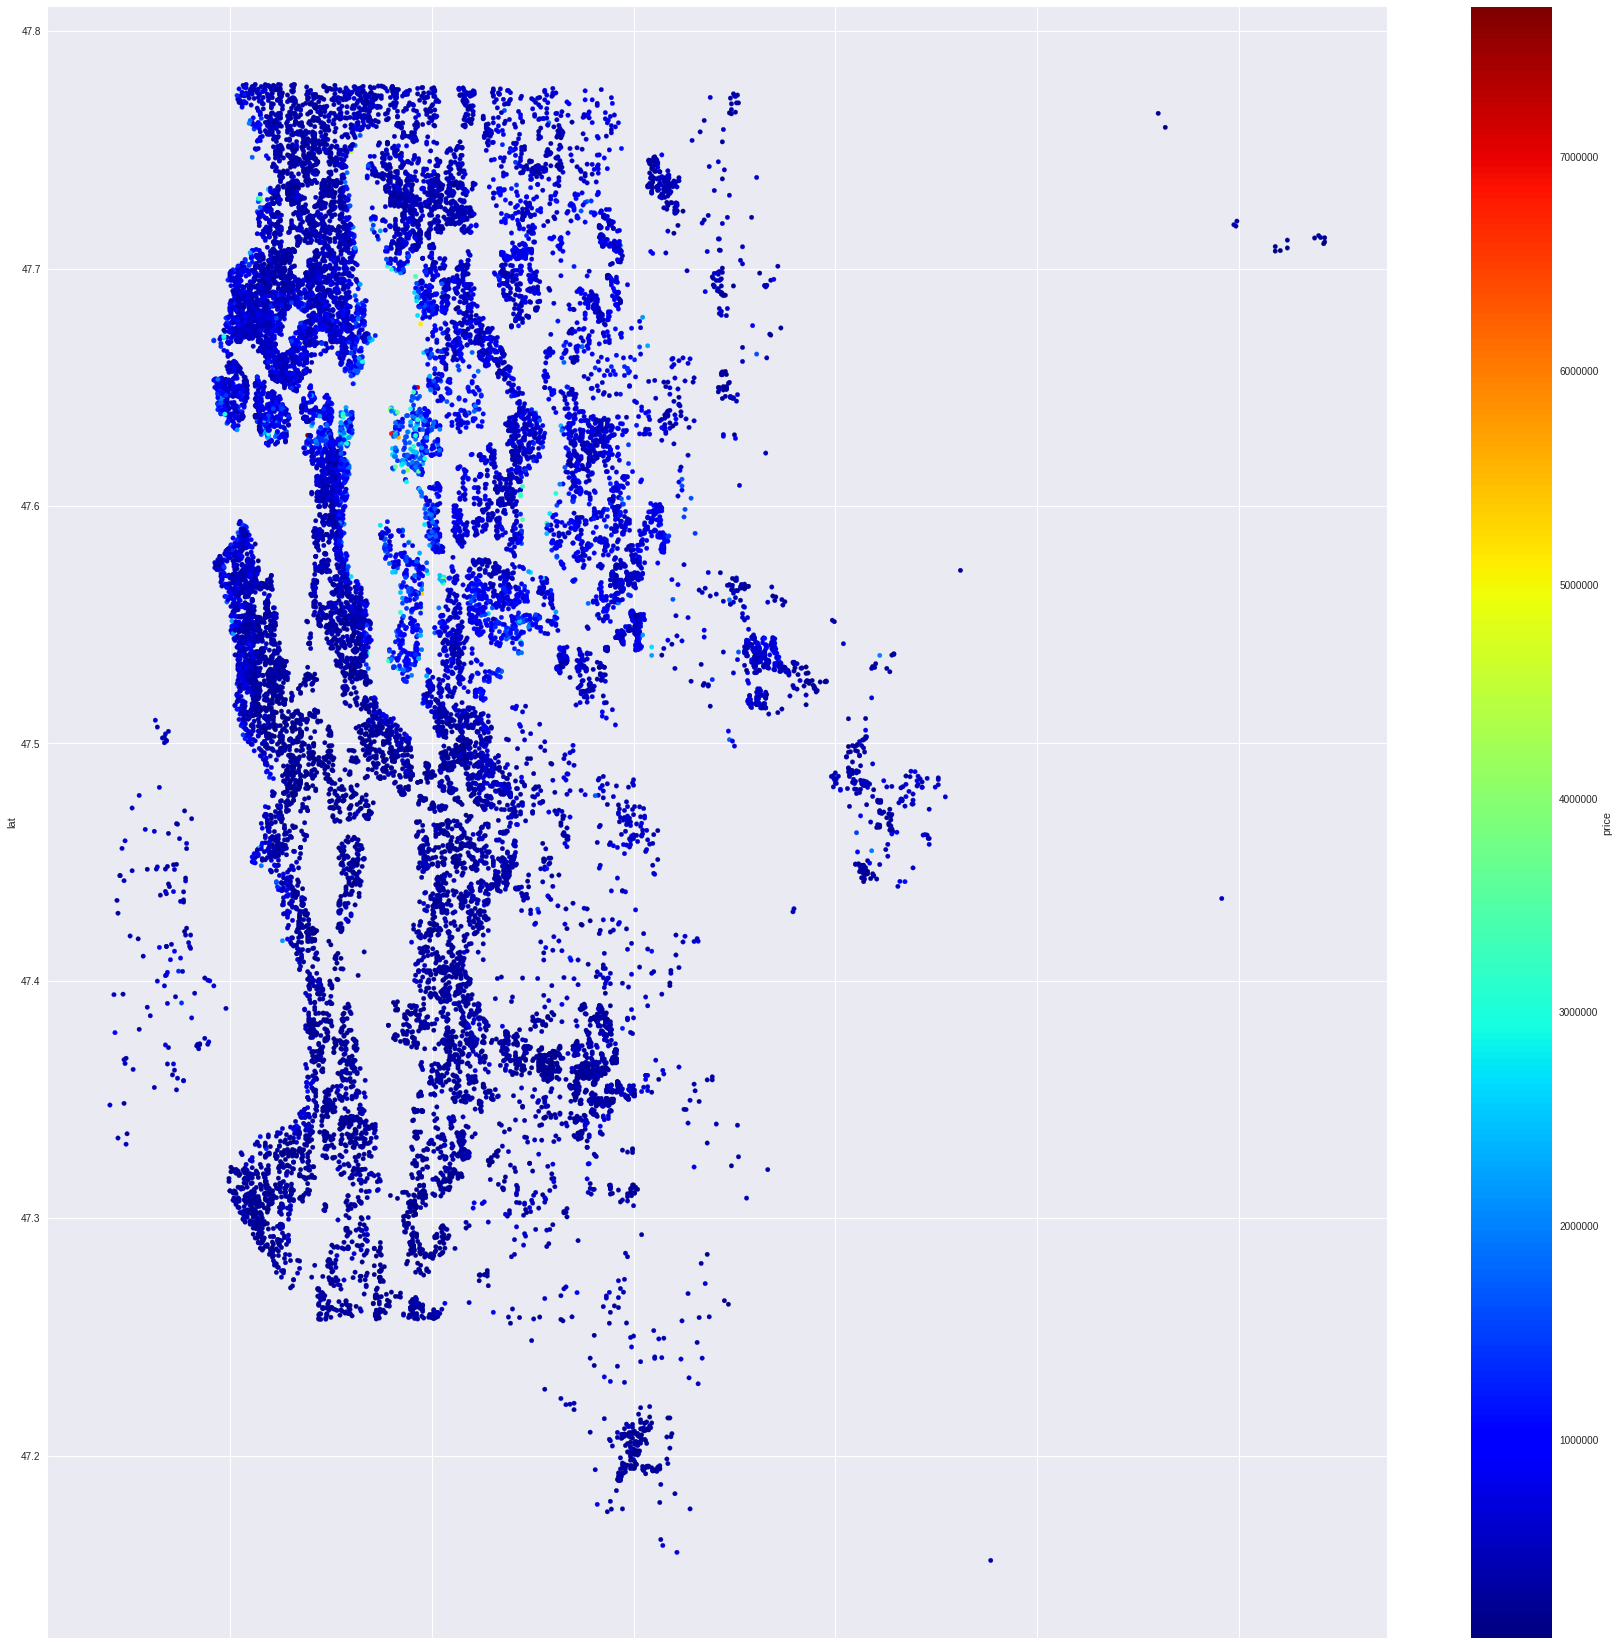

In [0]:
data.plot(kind='scatter',x='long',y='lat',c='price',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(30,30))


In [0]:
from sklearn.tree import DecisionTreeRegressor
my_model = DecisionTreeRegressor(criterion = 'mae')
my_model.fit(x_train,y_train)
print(my_model)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [0]:
print(my_model.get_params().keys())

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

my_model = DecisionTreeRegressor(criterion = 'mae')
my_model.fit(x_train,y_train)
scores = cross_val_score(estimator = my_model, X = loop_x,
                                      y = loop_y.ravel(), cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error')
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

Cross validation scores: [-108716.18853591 -105568.89951657 -102157.55939227 -103383.18111188
  -99056.87879834]
Cross validation : -103776.5415 +/- 3245.4187


In [0]:
from sklearn.feature_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

my_model = DecisionTreeRegressor(criterion = 'mae')

training_scores = []
abs_scores = []
scores = [] 

sele_x_train = x_train.copy()
sele_y_train = y_train.copy()

for selector in [SelectKBest(f_regression, k = 5),SelectKBest(f_regression),
                 SelectPercentile(f_regression),SelectFpr(f_regression),SelectFdr(f_regression)]:
  loop_x = sele_x_train.copy()
  loop_y = sele_y_train.copy()
  loop_x = selector.fit_transform(loop_x,loop_y.values.reshape(-1,1))
  
  my_model.fit(loop_x,loop_y.ravel())
  training_scores.append(my_model.score(loop_x,loop_y.ravel()))
  
  scores = np.asarray(cross_val_score(estimator = my_model, X = loop_x,
                                      y = loop_y.ravel(), cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
  abs_scores.append(-np.mean(scores))
  
  
print(training_scores)
print(abs_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.9949053280421768, 0.9994107799720079, 0.7109066972014797, 0.9994334936805653, 0.9994314190007584]
[195099.46761049723, 126241.89530386738, 166098.92738259668, 104855.45044889503, 102658.76830110498]


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFdr, f_regression

grid_x_train = x_train.copy()
grid_y_train = y_train.copy().values.reshape(-1,1)

pipe_dtree = make_pipeline(SelectFdr(f_regression),
                          DecisionTreeRegressor(criterion = 'mae'))

param_range = [2,3,4,5,6]

param_grid = {'decisiontreeregressor__max_depth':param_range,
             'decisiontreeregressor__min_samples_split':param_range,
             'decisiontreeregressor__min_samples_leaf':param_range}

gs = GridSearchCV(estimator = pipe_dtree,
                 param_grid = param_grid,
                 scoring = 'neg_mean_absolute_error',
                 cv = 5,
                 n_jobs= -1)

gs = gs.fit(grid_x_train,grid_y_train.ravel())
print(-(gs.best_score_))
print(gs.best_params_)

100850.03459944752
{'decisiontreeregressor__max_depth': 6, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 5}


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFdr, f_regression

grid_x_train = x_train.copy()
grid_y_train = y_train.copy().values.reshape(-1,1)

pipe_dtree = make_pipeline(SelectFdr(f_regression),
                          DecisionTreeRegressor(criterion = 'mae'))

param_range = [5,10,50,100]

param_grid = {'decisiontreeregressor__max_depth':param_range,
             'decisiontreeregressor__min_samples_split':param_range,
             'decisiontreeregressor__min_samples_leaf':param_range}

gs = GridSearchCV(estimator = pipe_dtree,
                 param_grid = param_grid,
                 scoring = 'neg_mean_absolute_error',
                 cv = 5,
                 n_jobs= -1)

gs = gs.fit(grid_x_train,grid_y_train.ravel())
print(-(gs.best_score_))
print(gs.best_params_)

88849.18035220995
{'decisiontreeregressor__max_depth': 50, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__min_samples_split': 50}


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFdr, f_regression

grid_x_train = x_train.copy()
grid_y_train = y_train.copy().values.reshape(-1,1)

pipe_dtree = make_pipeline(SelectFdr(f_regression),
                          DecisionTreeRegressor(criterion = 'mae'))

param_range = [5,100,50,1000]

param_grid = {'decisiontreeregressor__max_depth':param_range,
             'decisiontreeregressor__min_samples_split':param_range,
             'decisiontreeregressor__min_samples_leaf':param_range}

gs = GridSearchCV(estimator = pipe_dtree,
                 param_grid = param_grid,
                 scoring = 'neg_mean_absolute_error',
                 cv = 5,
                 n_jobs= -1)

gs = gs.fit(grid_x_train,grid_y_train.ravel())
print(-(gs.best_score_))
print(gs.best_params_)

88832.87379143646
{'decisiontreeregressor__max_depth': 100, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__min_samples_split': 50}


In [0]:
from sklearn.ensemble import RandomForestRegressor
my_model = RandomForestRegressor()
my_model.fit(x_train,y_train)
print(my_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

my_model = RandomForestRegressor(n_estimators = 30,criterion = 'mae')
my_model.fit(x_train,y_train)
scores = cross_val_score(estimator = my_model, X = x_train,
                                      y = y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error')
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

Cross validation scores: [-73366.80481699 -74722.52332528 -73955.99934392 -71081.01096915
 -69566.28082988]
Cross validation : -72538.5239 +/- 1919.5683


In [0]:
from sklearn.feature_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

my_model = RandomForestRegressor(criterion = 'mae')

training_scores = []
abs_scores = []
scores = [] 

sele_x_train = x_train.copy()
sele_y_train = y_train.copy()

for selector in [SelectKBest(f_regression, k = 5),SelectKBest(f_regression),
                 SelectPercentile(f_regression),SelectFpr(f_regression),SelectFdr(f_regression)]:
  loop_x = sele_x_train.copy()
  loop_y = sele_y_train.copy()
  loop_x = selector.fit_transform(loop_x,loop_y.values.reshape(-1,1))
  
  my_model.fit(loop_x,loop_y.ravel())
  training_scores.append(my_model.score(loop_x,loop_y.ravel()))
  
  scores = np.asarray(cross_val_score(estimator = my_model, X = loop_x,
                                      y = loop_y.ravel(), cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error'))
  abs_scores.append(-np.mean(scores))
  
  
print(training_scores)
print(abs_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.9119915077735591, 0.9588613477344929, 0.6919921251910125, 0.9739161097843776, 0.9722265897972769]
[152824.0236982044, 96102.26584599447, 157723.10015538672, 75925.75459254145, 76282.40287292819]


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import *

grid_x_train = x_train.copy()
grid_y_train = y_train.copy().values.reshape(-1,1)

pipe_dtree = make_pipeline(SelectFpr(f_regression),RandomForestRegressor(criterion = 'mae'))

param_range = [2,3,4]

param_grid = {'randomforestregressor__max_depth':param_range,
             'randomforestregressor__min_samples_split':param_range,
             'randomforestregressor__min_samples_leaf':param_range,
             'randomforestregressor__n_estimators':[100,200]}

gs = GridSearchCV(estimator = pipe_dtree,
                 param_grid = param_grid,
                 scoring = 'neg_mean_absolute_error',
                 cv = 5,
                 n_jobs= -1)

gs = gs.fit(grid_x_train,grid_y_train.ravel())
print(-(gs.best_score_))
print(gs.best_params_)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(bootstrap = True, max_depth = 90,max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 157)
rf.fit(x_train,y_train)
scores = cross_val_score(estimator = rf, X = x_train,
                                      y = y_train, cv = 5, n_jobs = -1,scoring = 'neg_median_absolute_error')
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))


Cross validation scores: [-39379.5122708  -41533.35952841 -39193.50324761 -39315.48606516
 -40017.33007555]
Cross validation : -39887.8382 +/- 870.9296


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap = True, max_depth = 90,max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 157)
rf.fit(x_train,y_train)
scores = cross_val_score(estimator = rf, X = x_train,
                                      y = y_train, cv = 5, n_jobs = -1,scoring = 'neg_mean_absolute_error')
print('Cross validation scores: %s' % scores)
print('Cross validation : %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))


Cross validation scores: [-71818.65544525 -72007.37720085 -71641.34755385 -70453.84421869
 -69555.83781724]
Cross validation : -71095.4124 +/- 941.7755


In [0]:
rf.score(x_test, y_test)

0.8607826327139471

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.5s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.3s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.5s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.3s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=157, mi

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.5min


[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  13.8s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  13.8s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  14.1s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  14.2s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=136, min_s

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 73}

In [0]:
from sklearn.metrics import median_absolute_error
y_hat_Search = rf_random.predict(x_test)
print("MAE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

MAE of RandomForest Regressor: 40431.67808219179 


In [0]:
rf_random.best_score_

0.8576173105837285

In [0]:
from sklearn.metrics import mean_absolute_error
y_hat_Search = rf_random.predict(x_test)
print("MAE of RandomForest Regressor: {} ".format(mean_absolute_error(y_hat_Search, y_test)))

MAE of RandomForest Regressor: 73681.41801980851 


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.6s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.4s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.4s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.3s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=157, mi

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.4min


[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  13.9s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  13.8s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  14.0s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  14.0s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=136, min_s

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 136}

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 136, min_samples_split = 5, min_samples_leaf=1, max_depth=80,
                             max_features = 'sqrt',bootstrap = False)
model.fit(x_train, y_train)
y_hat_Search = model.predict(x_test)
print("Mean Absolute Error of RandomForest Regressor: {} ".format(mean_absolute_error(y_hat_Search, y_test)))
print("Median Absolute Error of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

Mean Absolute Error of RandomForest Regressor: 73991.47256425877 
Median Absolute Error of RandomForest Regressor: 40989.65134803922 
